**UC Berekely-AIML Professional certificate. Module 20. Ensemble models** 

**Majority rule, collective wisdom, and voting systems in machine learning and artificial intelligence**


**Introduction**

If someone wants to make a decision, tries to get idea from people and friends to make better decision. The collective knowledge is better than the knowledge of the few is foundation of decision making in individual and public decisions. For example, in politics and economics, referring to majority rule and collective wisdom is common and voting system in an option to get the idea of people about the public issues. Similar idea in AIML is working. 

**VotingRegressor in AIML**

Suppose we want to understand the main drivers of diabetes, especial cancer, price of bitcoin, demand of energy; or any other thing that can be predicted with machine learning. We can use linear regression, non-linear regression, decision tree regression, knn regression, SVR and so on. In each regressors, we can define different parameters to check the best model. However, here is an option to improve efficiency by referring to the majority rule and voting system. In AIML, using VotingRegressor, we can define a pipeline and combine all regressors. VotingRegressor leads to higher score, if all regressors are independent. 

**Ensemble models in AIML**

Ensemble working with majority rule and collective wisdom. Ensemble models combine multiple algorithms to improve the predictive performance of each algorithm individually. Ensemble models typically consist of two strategies—bagging and boosting—and there are many examples of predefined ensemble algorithms.

**Bootstrapping and Bagging in AIML**

Bagging classifiers and regressors are ensemble models that fit the regressor and classifier models to random subsets of the original dataset. A final prediction is created by combining the predictions from each model. In these meta-estimators, randomization is introduced into the model-building process. Finally, the outcomes are aggregated to reach a categorical outcome: the aggregation averages over the iterations for a numerical target variable.

**Random Forests as Ensemble model for decision trees**

Random forests are ensemble techniques that include multiple decision trees and a method called bootstrap aggregation, which is commonly referred to as bagging, and which can perform both regression and classification tasks. This method combines multiple decision trees into one final output rather than relying on individual decision trees. Criteria for making decision about the depth of trees is oob score (out of the bag score). 

**Boosting to reduce bias in AIML**

Boosting is an ensemble learning technique that reduces the number of errors by combining weak learners into one strong learner. Boosting involves selecting a random sample of data, fitting a model, and then training each model sequentially. Three popular types of boosting are:
Adaptive boosting (AdaBoost)
Gradient boosting
Extreme gradient boosting (XGBoost)



**This file has seven sections. In each section, I cover one issue.** 

- Section one: Basic Aggregating of Models

- Section two: Comparing Aggregate Models for Regression
  
- ection three : Implementing Bootstrapping
  
- Section four:  Implementing Bagging

- Section five:  Implementing Random Forests

- Section six: Implementing the AdaBoost Algorithm

- Section seven: Gradient Boosting


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# <span>  section one Basic Aggregating of Models
This activity focuses on combining models in an ensemble to make predictions. I will first create an ensemble on my own and then be introduced to the VotingClassifier from scikit-learn to implement these ensembles. I will consider a classification problem and use Logistic Regression, KNN, and Support Vector Machines to build your ensemble. 

### The Data


The data was retrieved from [kaggle](https://www.kaggle.com/) and contains information from fetal Cardiotocogram exams that were classified into three categories:


- Normal
- Suspect
- Pathological

In [4]:
df = pd.read_csv('data/fetal_health.csv')

In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [8]:
X = df.drop('fetal_health', axis = 1)
y = df['fetal_health']

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 1-1- Model Predictions



Given the models below and the starter code, scale that data and train the models on the data, assigning the predictions as an array to the given dictionary.  

In [10]:
models = [LogisticRegression(), KNeighborsClassifier(), SVC()]

In [11]:
#define list of results 
results = {'logistic': [],
          'knn': [],
          'svc': []}
i = 0
for model in models:
    model.fit(X, y)
    results[list(results.keys())[i]] = model.predict(X)
    i += 1
    
results

{'logistic': array([2., 1., 1., ..., 2., 2., 1.]),
 'knn': array([2., 1., 1., ..., 2., 2., 1.]),
 'svc': array([2., 1., 1., ..., 2., 2., 1.])}

### 1-2- Majority Vote

Using your dictionary of predictions, create a DataFrame called `prediction_df` and add a column to the DataFrame named `ensemble_prediction` based on the majority vote of your predictions.

In [12]:
prediction_df = pd.DataFrame(results)
prediction_df['ensemble_prediction'] = prediction_df.mode(axis = 1).iloc[:, 0]


prediction_df.head()

,logistic,knn,svc,ensemble_prediction
0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


### 1-3- Accuracy of Classifiers

Create a list of accuracy scores for each of the classifiers.  Use this list with the columns to create a DataFrame named `results_df` to hold the accuracy scores of the classifiers.  What rank was your ensemble?

In [14]:
accuracies = []
for col in prediction_df.columns:
    accuracies.append(accuracy_score(y, prediction_df[col]))

accuracies

[0.9045155221072436, 0.9374412041392286, 0.929444967074318, 0.9270931326434619]


### 1-4- Using the Voting Classifier


Use the documentation and User Guide [here](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier) to create a voting ensemble using the `VotingClassifier` based on the majority vote using the same three classifiers `svc`, `lgr`, and `knn`.  Assign the accuracy of the ensemble to `vote_accuracy` below.

In [15]:
voter = VotingClassifier([('svc', SVC()), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())])
voter.fit(X, y)
vote_accuracy = voter.score(X, y)

vote_accuracy

0.9270931326434619



### 1-5- Voting based on probabilities

Consult the user guide and create a new ensemble that makes predictions based on the probabilities of the estimators.  **HINT**: This has to do with the `voting` parameter.  Assign the ensemble as `soft_voter` and the accuracy as `soft_accuracy`. 

In [16]:
soft_voter = VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())], voting = 'soft')
soft_voter.fit(X, y)
soft_accuracy = soft_voter.score(X, y)

soft_accuracy

0.9379115710253998

### 1-6- Using different weights 



Finally, consider weighing the classifiers differently.  Use the Logistic Regression estimator as .5 of the weight in predicting based on majority votes, and the SVC and KNN as 0.25 each.  Assign the accuracy of these predictions on the test data to `weighted_acc`.  

In [17]:
weighted_voter = VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())],
                                 weights=[0.25, .5, .25])
weighted_voter.fit(X, y)
weighted_score = weighted_voter.score(X, y)

weighted_score

0.9214487300094073

# Section two - Comparing Aggregate Models for Regression

This try-it focuses on utilizing ensemble models in a regression setting.  Much like I have used individual classification estimators to form an ensemble of estimators -- here the goal is to explore ensembles for regression models.  I will use scikitlearn to carry out the ensembles using the `VotingRegressor`.   


#### Dataset and Task

Below, a dataset containing census information on individuals and their hourly wage is loaded using the `fetch_openml` function.  OpenML is another repository for datasets [here](https://www.openml.org/).  task is to use ensemble methods to explore predicting the `wage` column of the data.  Your ensemble should at the very least consider the following models:

- `LinearRegression` -- perhaps you even want the `TransformedTargetRegressor` here.
- `KNeighborsRegressor`
- `DecisionTreeRegressor`
- `Ridge`
- `SVR`

I Tune the `VotingRegressor` to try to optimize the prediction performance and determine if the wisdom of the crowd performed better in this setting than any of the individual models themselves. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [19]:
# Load dataset
survey = fetch_openml(data_id=534, as_frame=True).frame

In [20]:
# Change feature names to lowercase
survey.columns = survey.columns.str.lower()

# Check for missing values
print(survey.isnull().sum())

# Drop rows with missing values
survey.dropna(inplace=True)

# Separate features and target variable
X = survey.drop(columns=['wage'])
y = survey['wage']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual regressors
linear_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor(random_state=42)
ridge_reg = Ridge()
svr_reg = SVR()

# Create pipelines for each regressor
pipelines = {
    'linear': Pipeline([('scaler', StandardScaler()), ('regressor', linear_reg)]),
    'knn': Pipeline([('scaler', StandardScaler()), ('regressor', knn_reg)]),
    'tree': Pipeline([('regressor', tree_reg)]),
    'ridge': Pipeline([('scaler', StandardScaler()), ('regressor', ridge_reg)]),
    'svr': Pipeline([('scaler', StandardScaler()), ('regressor', svr_reg)])
}

# Define the Voting Regressor
voting_reg = VotingRegressor(estimators=[
    ('linear', pipelines['linear']),
    ('knn', pipelines['knn']),
    ('tree', pipelines['tree']),
    ('ridge', pipelines['ridge']),
    ('svr', pipelines['svr'])
])

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Evaluate individual models without grid search
results_before_gs = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    mse = evaluate_model(pipeline, X_test, y_test)
    results_before_gs[name] = mse

# Evaluate Voting Regressor without grid search
voting_reg.fit(X_train, y_train)
voting_mse_before_gs = evaluate_model(voting_reg, X_test, y_test)
results_before_gs['voting'] = voting_mse_before_gs

# Print results before grid search
print("Results Before Grid Search:")
for name, mse in results_before_gs.items():
    print(f'{name}: MSE = {mse}')

# Define parameter grids for Grid Search
param_grids = {
    'linear': {},
    'knn': {'regressor__n_neighbors': [3, 5, 7]},
    'tree': {'regressor__max_depth': [3, 5, 7]},
    'ridge': {'regressor__alpha': [0.1, 1.0, 10.0]},
    'svr': {'regressor__C': [0.1, 1.0, 10.0], 'regressor__gamma': ['scale', 'auto']}
}

# Perform Grid Search and evaluate models
results_after_gs = {}
best_pipelines = {}

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_pipeline = grid_search.best_estimator_
    best_pipelines[name] = best_pipeline
    mse = evaluate_model(best_pipeline, X_test, y_test)
    results_after_gs[name] = mse

# Define the optimized Voting Regressor
optimized_voting_reg = VotingRegressor(estimators=[
    ('linear', best_pipelines['linear']),
    ('knn', best_pipelines['knn']),
    ('tree', best_pipelines['tree']),
    ('ridge', best_pipelines['ridge']),
    ('svr', best_pipelines['svr'])
])

# Fit the optimized Voting Regressor
optimized_voting_reg.fit(X_train, y_train)
voting_mse_after_gs = evaluate_model(optimized_voting_reg, X_test, y_test)
results_after_gs['voting'] = voting_mse_after_gs

# Print results after grid search
print("\nResults After Grid Search:")
for name, mse in results_after_gs.items():
    print(f'{name}: MSE = {mse}')

# Feature importance from Decision Tree
tree_reg.fit(X_train, y_train)
importances_tree = tree_reg.feature_importances_
feature_importance_tree_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances_tree})
feature_importance_tree_df = feature_importance_tree_df.sort_values(by='importance', ascending=False)
print("\nFeature Importance from Decision Tree:")
print(feature_importance_tree_df)

# Coefficients from Linear regression
linear_reg.fit(X_train, y_train)
coefficients_linear = linear_reg.coef_
coefficients_linear_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients_linear})
coefficients_linear_df = coefficients_linear_df.sort_values(by='coefficient', ascending=False)
print("\nCoefficients from Linear Regression:")
print(coefficients_linear_df)

# Coefficients from Ridge regression
ridge_reg.fit(X_train, y_train)
coefficients_ridge = ridge_reg.coef_
coefficients_ridge_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients_ridge})
coefficients_ridge_df = coefficients_ridge_df.sort_values(by='coefficient', ascending=False)
print("\nCoefficients from Ridge Regression:")
print(coefficients_ridge_df)

# Feature importance using permutation for KNN
result_knn = permutation_importance(best_pipelines['knn'], X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances_knn = pd.DataFrame({'feature': X_test.columns, 'importance': result_knn.importances_mean})
perm_importances_knn = perm_importances_knn.sort_values(by='importance', ascending=False)
print("\nPermutation Importance from KNN:")
print(perm_importances_knn)

# Feature importance using permutation for SVR
result_svr = permutation_importance(best_pipelines['svr'], X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances_svr = pd.DataFrame({'feature': X_test.columns, 'importance': result_svr.importances_mean})
perm_importances_svr = perm_importances_svr.sort_values(by='importance', ascending=False)
print("\nPermutation Importance from SVR:")
print(perm_importances_svr)

education     0
south         0
sex           0
experience    0
union         0
wage          0
age           0
race          0
occupation    0
sector        0
marr          0
dtype: int64
Results Before Grid Search:
linear: MSE = 19.50259732411236
knn: MSE = 22.875903850467285
tree: MSE = 59.54706869158879
ridge: MSE = 19.49588844744507
svr: MSE = 21.70955180758242
voting: MSE = 21.5379301705317

Results After Grid Search:
linear: MSE = 19.50259732411236
knn: MSE = 21.052861815754337
tree: MSE = 22.469790483538922
ridge: MSE = 19.56878914773628
svr: MSE = 21.70955180758242
voting: MSE = 19.56847673937083

Feature Importance from Decision Tree:
                    feature  importance
1                experience    0.288039
0                 education    0.197098
2                       age    0.163294
8     occupation_Management    0.048567
5          union_not_member    0.045611
12       occupation_Service    0.041825
4                  sex_male    0.041818
3                 south_yes

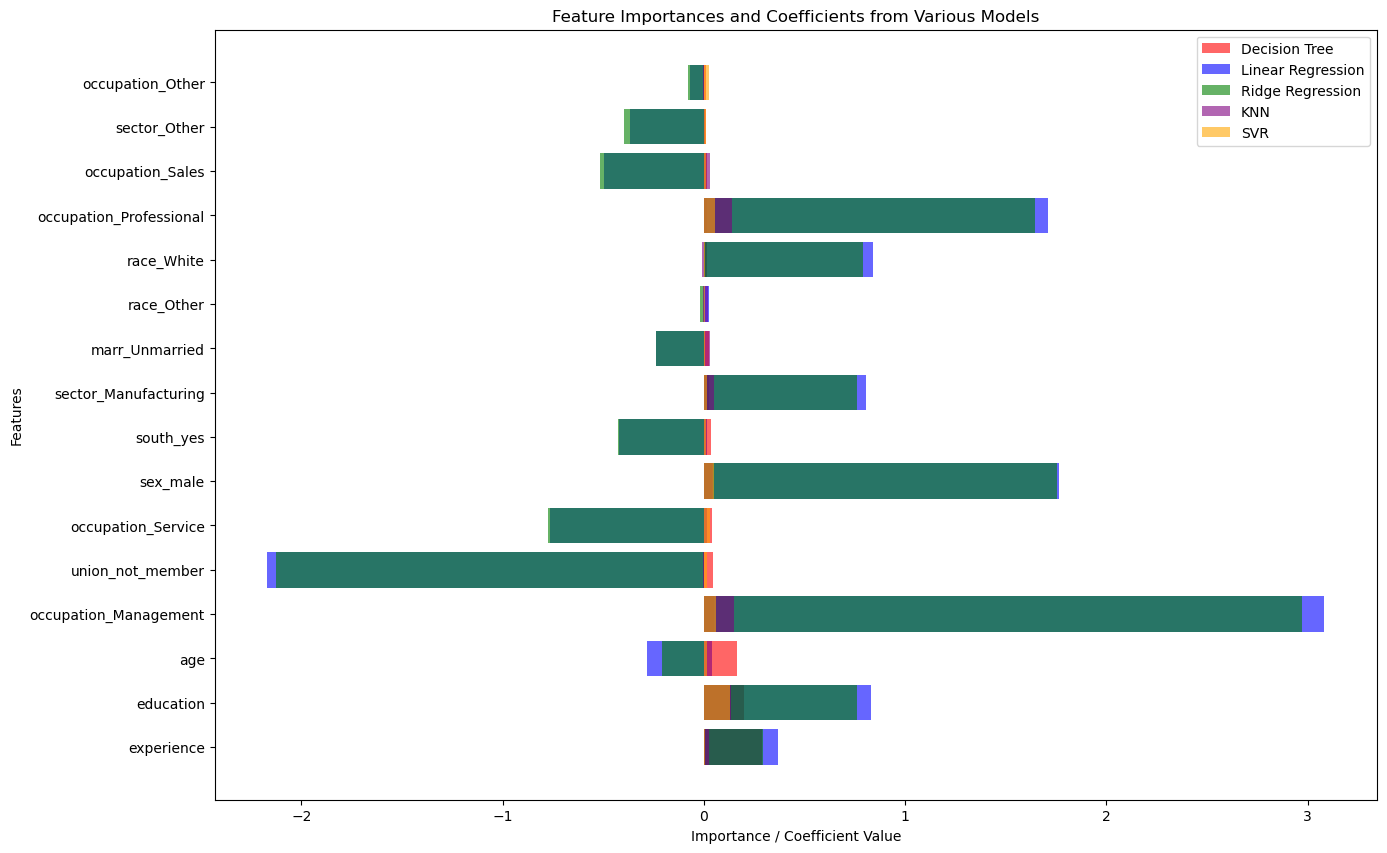

In [21]:
# Plotting the feature importances and coefficients
plt.figure(figsize=(15, 10))

# Plot Decision Tree feature importance
plt.barh(feature_importance_tree_df['feature'], feature_importance_tree_df['importance'], color='red', alpha=0.6, label='Decision Tree')

# Plot Linear Regression coefficients
plt.barh(coefficients_linear_df['feature'], coefficients_linear_df['coefficient'], color='blue', alpha=0.6, label='Linear Regression')

# Plot Ridge Regression coefficients
plt.barh(coefficients_ridge_df['feature'], coefficients_ridge_df['coefficient'], color='green', alpha=0.6, label='Ridge Regression')

# Plot KNN permutation importance
plt.barh(perm_importances_knn['feature'], perm_importances_knn['importance'], color='purple', alpha=0.6, label='KNN')

# Plot SVR permutation importance
plt.barh(perm_importances_svr['feature'], perm_importances_svr['importance'], color='orange', alpha=0.6, label='SVR')

plt.xlabel('Importance / Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importances and Coefficients from Various Models')
plt.legend()
plt.show()

# Section three : Implementing Bootstrapping


This activity focuses on the construction of bootstrapped samples using `pandas`.  I will take samples with replacement from the data and build Logistic Regression models on these samples.  This is a starting step towards the random forest using a Decision Tree over a Logistic Regressor.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/fetal_health.csv')

In [3]:
X, y = df.drop('fetal_health', axis = 1), df['fetal_health']

In [4]:
X.sample(10, random_state = 42)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
282,133.0,0.002,0.010,0.003,0.002,0.0,0.000,46.0,1.1,0.0,...,69.0,95.0,164.0,5.0,0.0,139.0,135.0,138.0,9.0,0.0
1999,125.0,0.000,0.001,0.009,0.008,0.0,0.000,62.0,1.7,0.0,...,72.0,68.0,140.0,5.0,0.0,130.0,116.0,125.0,29.0,1.0
1709,131.0,0.004,0.003,0.004,0.005,0.0,0.001,60.0,2.1,0.0,...,90.0,78.0,168.0,8.0,0.0,133.0,127.0,132.0,21.0,0.0
988,131.0,0.011,0.000,0.005,0.000,0.0,0.000,29.0,1.3,0.0,...,89.0,82.0,171.0,8.0,0.0,143.0,145.0,145.0,9.0,1.0
2018,125.0,0.000,0.000,0.008,0.007,0.0,0.001,64.0,1.3,0.0,...,77.0,78.0,155.0,4.0,0.0,114.0,111.0,114.0,7.0,0.0
297,148.0,0.000,0.012,0.000,0.000,0.0,0.000,75.0,0.2,84.0,...,7.0,145.0,152.0,1.0,0.0,148.0,148.0,149.0,0.0,0.0
1737,134.0,0.005,0.001,0.007,0.005,0.0,0.000,61.0,1.1,0.0,...,83.0,90.0,173.0,5.0,0.0,142.0,143.0,147.0,17.0,1.0
651,123.0,0.000,0.000,0.000,0.000,0.0,0.000,74.0,0.3,90.0,...,9.0,120.0,129.0,2.0,0.0,123.0,124.0,125.0,0.0,0.0
70,144.0,0.001,0.000,0.005,0.000,0.0,0.000,45.0,0.8,2.0,...,30.0,138.0,168.0,3.0,0.0,162.0,157.0,160.0,5.0,1.0
290,144.0,0.000,0.005,0.000,0.000,0.0,0.000,65.0,0.4,21.0,...,27.0,129.0,156.0,2.0,0.0,150.0,146.0,148.0,3.0,1.0


## 3-1- Taking Samples with Replacement


the starter code for the `for` loop below as instructed:

- Use the `.sample()` method on the data `X` to take samples with replacement of size 20  Use the iteration index `i` as the `random_state` for each sample and set the argument `replace` equal to `True`.
- Calculate the mean of each `sample` and append it to the list `means`.
- Create a DataFrame named `sample_means` where each row is the observed mean of the sample column in `X`. 

In [6]:
means = []
for i in range(100):
    sample = X.sample(20, random_state=i, replace = True)
    means.append(sample.mean())
sample_means = pd.DataFrame(means)


### ANSWER CHECK
sample_means.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,130.85,0.00250,0.00155,0.00420,0.00355,0.0,0.00000,53.75,1.295,10.90,...,81.15,83.50,164.65,5.60,0.45,134.30,130.50,134.85,16.85,0.15
1,133.10,0.00355,0.00120,0.00440,0.00185,0.0,0.00025,41.10,1.395,8.00,...,77.30,84.65,161.95,4.65,0.40,136.40,133.60,137.45,13.45,0.40
2,131.85,0.00225,0.00930,0.00485,0.00295,0.0,0.00040,34.80,1.955,6.85,...,74.05,89.80,163.85,4.05,0.25,133.85,129.55,132.85,26.25,0.20
3,132.60,0.00425,0.00325,0.00455,0.00230,0.0,0.00020,48.10,1.490,5.15,...,75.25,90.95,166.20,4.10,0.40,140.80,135.60,140.20,20.05,0.45
4,134.90,0.00175,0.00335,0.00495,0.00245,0.0,0.00005,40.30,1.310,13.40,...,80.50,83.85,164.35,4.95,0.45,139.05,134.50,138.50,13.00,0.65


## 3-2- Models on samples



Anticipating the bootstrap aggregation, build a logistic regression model on each iterations sample by following the steps below:

- Create `100` bootstrap samples of size `100` from the original dataset `df` using the `sample` method with  `random_state`  equal to `i` and `replace` equal to `True`.
- Split the data into features `X` and target `y`. `X` will contain all column of `df` except the `fetal_health`. `y` will be equal to the `fetal_health` column.
- Instantiate a logistic regression model with `random_state` equal to `42` and fit it to this data `X` and `y`.  
- Store the coefficients from each fitted model in a list `coefs`.


Finally, outside the `for` loop, create a DataFrame `coef_df` from the collected coefficients, with the column names matching those of the feature set `X`.


In [7]:
coefs = []
for i in range(100):
    sample = df.sample(100, random_state = i,replace = True)
    X, y = sample.drop('fetal_health', axis = 1), sample['fetal_health']
    lgr = LogisticRegression(random_state=42)
    lgr.fit(X, y)
    coefs.append(lgr.coef_[0])
coef_df = pd.DataFrame(coefs, columns = X.columns)


### ANSWER CHECK
coef_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.137399,0.000366,-0.000276,0.000530,0.000331,0.000000e+00,-0.000120,-0.301140,0.093315,-0.190851,...,-0.055386,0.163278,0.107892,-0.016178,-0.015717,-0.021420,0.167581,0.028635,-0.117195,-0.149779
1,-0.061691,0.000470,0.000546,0.000407,0.000115,-6.669241e-07,-0.000151,-0.353678,0.018719,-0.030565,...,0.105792,0.058392,0.164184,-0.175497,-0.044569,-0.253011,0.240469,0.017689,-0.159757,-0.078947
2,-0.075480,0.000434,-0.000229,0.000297,0.000023,0.000000e+00,-0.000075,-0.323810,0.092074,-0.143589,...,0.005551,0.065392,0.070943,-0.032990,-0.144006,0.071054,-0.055389,0.134174,-0.051193,-0.000221
3,-0.130623,0.001060,-0.003256,0.000483,0.000370,0.000000e+00,-0.000067,-0.274048,0.164187,-0.206990,...,0.078620,-0.122272,-0.043652,-0.082848,0.120813,0.180341,-0.121192,0.433349,-0.212898,0.001095
4,-0.072970,0.000633,-0.000240,0.002094,0.000060,0.000000e+00,-0.000014,-0.506445,0.150961,-0.303087,...,0.005902,0.065294,0.071196,-0.038196,-0.430653,0.116008,0.077675,0.116427,-0.090436,-0.008444


# Section four- Implementing Bagging


This activity focuses on using the `BaggingClassifier`.  I will use the Scikit-Learn implementation to compare performance on the fetal health dataset to that of the other models in the module -- Random Forests, Adaptive Boosting, and Gradient Boosting. The `BaggingClassifier` is a meta estimator that will aggregate estimators built on samples of the data.  I am to specify certain estimators and samples to become familiar with the functionality of the estimator and the variations you can produce with important arguments. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### Data and Documentation

Below the data is loaded and prepared.  For this exercise, you will be expected to consult the documentation on the `BaggingClassifier` [here](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator).  The vocabulary in each problem can be found in the documentation and you are expected to use the correct settings for the arguments as a result of reading the documentation.  For each model, be sure to set `random_state = 42`.  

In [9]:
df = pd.read_csv('data/fetal_health.csv')
X, y = df.drop('fetal_health', axis = 1), df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 4-1- Aggregating bootstrap models
To start, I create an ensemble of a decision tree using the `BaggingClassifier` function with `random_state = 42`. Fit this model to the training data `X_train` and `y_train`. Assign this moel to `bagged_model`.

Next, use the `score` function on `bagged_model` to calculate the performance on the test data. Assign this value to `bagged_score`.

In [10]:
bagged_model = BaggingClassifier(random_state=42).fit(X_train, y_train)
bagged_score = bagged_model.score(X_test, y_test)
### END SOLUTION

### ANSWER CHECK
print(bagged_score)

0.9511278195488722


## 4-2- Pasting vs. Bagging




Create an ensemble of a decision tree using the `BaggingClassifier` function with `random_state = 42`. Consult the documentation [here](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator) and adjust the appropriate argument of `BaggingClassifier` to change from **bagging** to **pasting**. Fit this model to the training data `X_train` and `y_train`. Assign this moel to `pasted_model`.

Next, use the `score` function on `pasted_model` to calculate the performance on the test data. Assign this value to `pasted_score`.

In [12]:
pasted_model = BaggingClassifier(random_state=42, 
                                bootstrap=False).fit(X_train, y_train)
pasted_score = pasted_model.score(X_test, y_test)
### END SOLUTION

### ANSWER CHECK
print(pasted_score)

0.9379699248120301


## 4-3- Random Subspaces


Create an ensemble of a decision tree using the `BaggingClassifier` function with `random_state = 42`. Consult the documentation [here](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator) and adjust the appropriate argument to change from **bagging** to **random subspaces** with at most 10 features sampled. Fit this model to the training data `X_train` and `y_train`. Assign this moel to `subspace_model`.

Next, use the `score` function on `subspace_model` to calculate the performance on the test data. Assign this value to `subspace_score`.


In [13]:
subspace_model = BaggingClassifier(random_state=42, 
                                bootstrap=False, 
                                  max_features=10).fit(X_train, y_train)
subspace_score = subspace_model.score(X_test, y_test)
### END SOLUTION

### ANSWER CHECK
print(subspace_score)

0.943609022556391


## 4-4- Random Patches
Create an ensemble of a decision tree using the `BaggingClassifier` function with `random_state = 42`. Consult the documentation [here](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator) and adjust the appropriate argument to change from **bagging** to **random patches**. Use no more than 30% of the data and no more than 10 features in your samples. Assign this moel to `patches_model`.

Next, use the `score` function on `patches_model` to calculate the performance on the test data. Assign this value to `patches_score`.



In [15]:
patches_model = BaggingClassifier(random_state=42, 
                                bootstrap=False, 
                                  max_features=10,
                                 max_samples=0.3).fit(X_train, y_train)
patches_score = patches_model.score(X_test, y_test)
### END SOLUTION

### ANSWER CHECK
print(patches_score)

0.9304511278195489


# Section five: Implementing Random Forests



This activity focuses on building models using the `RandomForestClassifier` from Scikit-Learn.  I will explore the estimator, and how the number of trees in the model affect the performance. To evaluate your model I will look to the out of bag data rather than a test set. 


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import animation

np.random.seed(31415)
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('data/fetal_health.csv')

In [18]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [19]:
X, y = df.drop('fetal_health', axis = 1), df['fetal_health']

## 5-1- Buildilng the Model


Below, create an instance of the `RandomForestClassifier` estimtor with `random_state = 42` and
`oob_score = True`  and fit to X and Y. Assign this model to `forest_1` below.

Next, use the `oob_score_` method on `forest_1` to calculate the oob score of your model and assign the result to `score`.

In [21]:
forest_1 = RandomForestClassifier(oob_score=True, random_state=42).fit(X, y)
score = forest_1.oob_score_
### END SOLUTION

### ANSWER CHECK
print(score)

0.9444967074317968


## 5-2- Changing the number of trees


The `n_trees` list below defined the different numbers of trees to use.

In the code cell below, I complete the `for` loop to iterate over the different number of trees and keep track of the oob score with the list `oob_scores`.   set `random_state = 42`, `oob_score = True`, and `n_estimators` equal to the number of trees.


In [22]:
n_trees = [1, 10, 100, 500, 1000, 2000]

In [23]:
oob_scores = []
for i in n_trees:
    forest = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=i).fit(X, y)
    oob_scores.append(forest.oob_score_)
### END SOLUTION

### ANSWER CHECK
print(oob_scores)

[0.8287864534336783, 0.9158043273753528, 0.9444967074317968, 0.944967074317968, 0.9468485418626529, 0.9468485418626529]


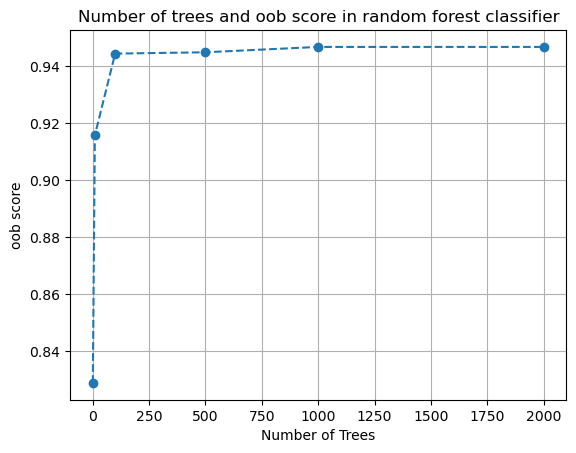

In [24]:
plt.plot(n_trees, oob_scores, '--o')
plt.grid()
plt.title('Number of trees and oob score in random forest classifier')
plt.xlabel('Number of Trees')
plt.ylabel("oob score");

## 5-3- Changing the trees themselves


The `RandomForestClassifier` contains most of the same parameters as the `DecisionTreeClassifier` including `max_depth` and `ccp_alpha` that control the geometry of the individual trees.  

While searching over many parameters of a forest might seem like a good idea, in this context it is too computationally complex to be exhaustive.  

Below, compare trees with 200 trees in the model, and explore if the depth of these trees effects the out of bag score.  Use the list `depths` below, and use the list `depth_oob` to keep track of the scores.


In [25]:
depths = [1, 2, 3, 4, 5, None]

In [26]:
depth_oobs = []
for d in depths:
    forest = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=200,
                                   max_depth = d).fit(X, y)
    depth_oobs.append(forest.oob_score_)
### END SOLUTION

### ANSWER CHECK
print(depth_oobs)

[0.7784571966133584, 0.8598306679209784, 0.8955785512699906, 0.9059266227657573, 0.9158043273753528, 0.9468485418626529]


## 5-4- plotting Random Forest 

### 5-4-1 defining fuctions for plot 

In [49]:
cm = plt.cm.RdBu

cm_bright = ListedColormap(["#0000FF", "#FF0000"])

def get_Xgrid():

    dlim=[-2,2.7,-2,2.7]

    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()

    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
        
    return d1_grid, d2_grid, d12_array


def plot_RF_contour(model):
    
    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]
    y_array = model.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))

    fig, ax = plt.subplots(figsize=(8,8))
    db = plt.contourf(d1_grid, d2_grid, y_grid,cmap=cm,alpha=0.7)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
    plt.xlim((-2,2.7))
    plt.ylim((-2,2.7))
    plt.xticks(())
    plt.yticks(())
    plt.axis('equal')
    plt.grid(linestyle='--')
    ax.axis('off')
    return db
    
    

def plot_RF_colormesh(model):
    
    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]
    y_array = model.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))

    fig, ax = plt.subplots(figsize=(8,8))
    db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm,alpha=0.7)
    tit = plt.title('')

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
    plt.xlim((-2,2.7))
    plt.ylim((-2,2.7))
    plt.xticks(())
    plt.yticks(())
    plt.axis('equal')
    plt.grid(linestyle='--')
    ax.axis('off')
    return db, tit

In [50]:
### 5-4-2- dataset 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=150, noise=0.22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

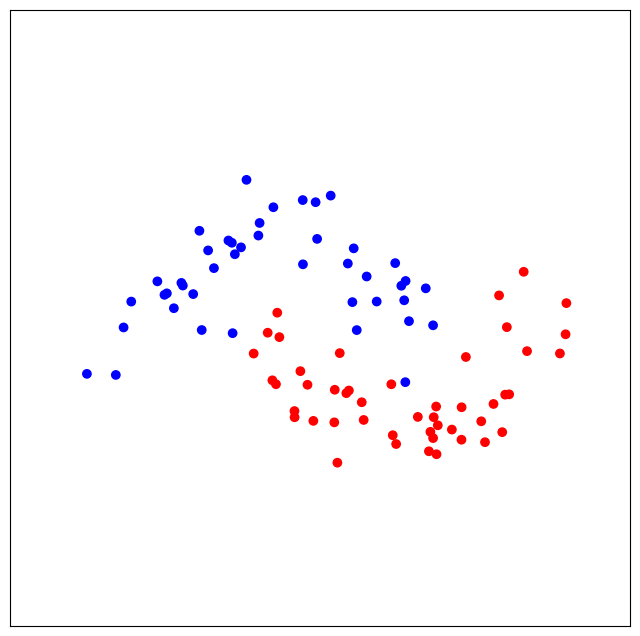

In [51]:
X, y = make_moons(n_samples=150, noise=0.22 , random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=3498)


h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.xlim((-2,2.7))
plt.ylim((-2,2.7))
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
plt.grid(linestyle='--')

### 5-4-3- defining the random forest and plot it 

In [53]:
model = RandomForestClassifier(n_estimators=8).fit(X_train, y_train)
model.feature_importances_

array([0.37856341, 0.62143659])

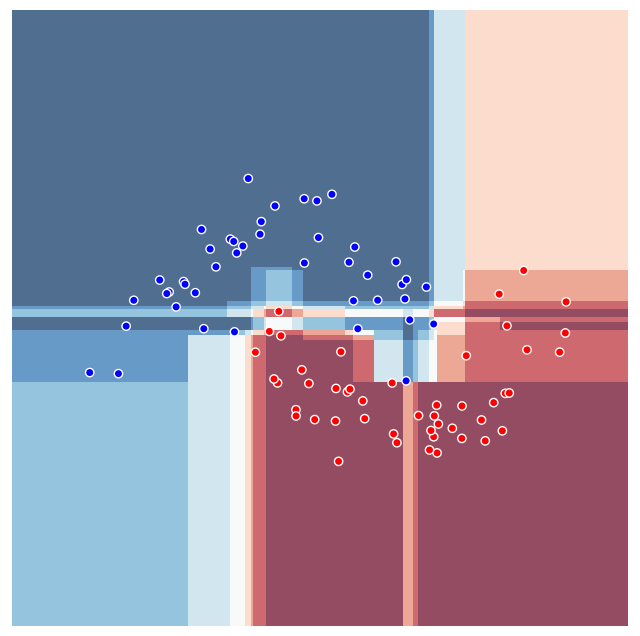

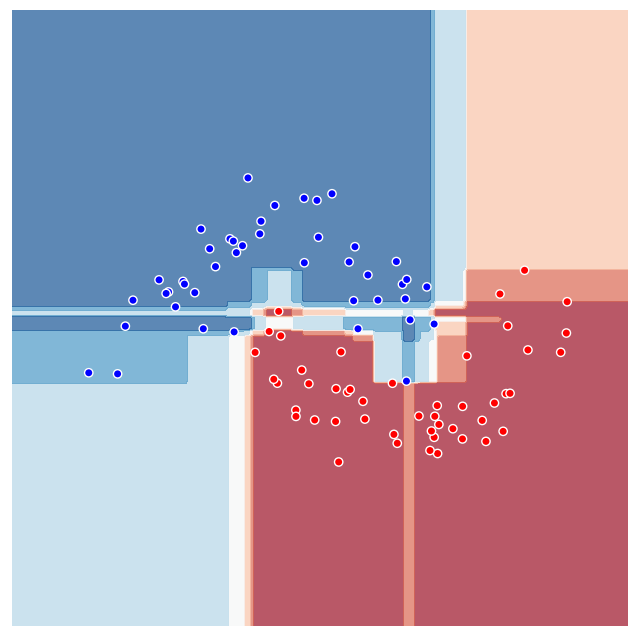

In [54]:
plot_RF_colormesh(model)
plot_RF_contour(model)

### 5-4-4  Animation and defining animation function 

(-2.01, 2.6900000000000044, -2.01, 2.6900000000000044)

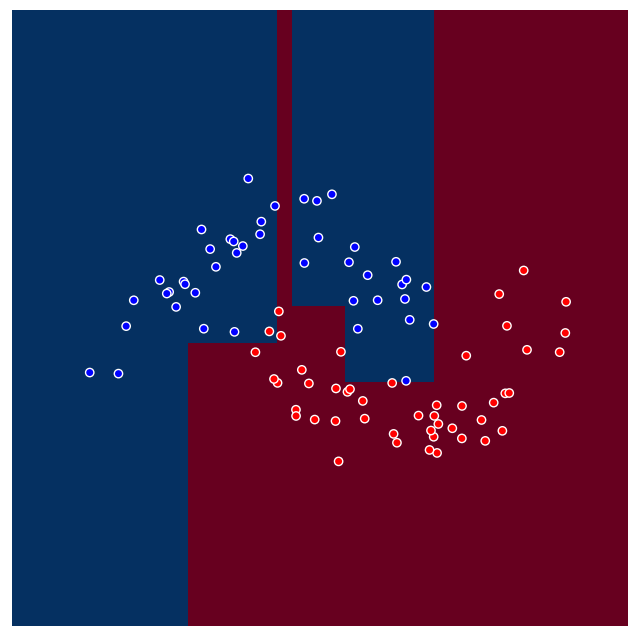

In [55]:
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)

d1_grid, d2_grid, d12_array = get_Xgrid()
n = d1_grid.shape[0]
y_array = model.predict_proba(d12_array)
y_array = y_array[:,0]
y_grid = y_array.reshape((n,n))

fig, ax = plt.subplots(figsize=(8,8))
db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm)
tit = plt.title('')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
plt.xlim((-2,2.7))
plt.ylim((-2,2.7))
plt.xticks(())
plt.yticks(())
plt.axis('equal')
plt.grid(linestyle='--')
ax.axis('off')


In [56]:
def init():
    Z = np.append(np.zeros((200,200)), np.ones((200,200)),axis=1)
    db.set_array(Z.ravel())
    return db,

# animation function.  This is called sequentially
def animate_rf(i):
    nest = i+1
    model = RandomForestClassifier(n_estimators=nest, max_features=1)
    model.fit(X_train, y_train)
    
    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]

    y_array = model.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))
    
    db.set_array(y_grid[:-1,:-1].ravel())
    tit.set_text("# trees={}".format(nest))
    return db,

MovieWriter ffmpeg unavailable; using Pillow instead.


TypeError: AbstractMovieWriter.__init__() got an unexpected keyword argument 'extra_args'

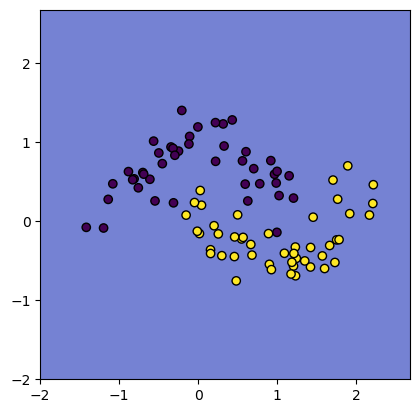

In [57]:


# Initialize plot
fig, ax = plt.subplots()
d1_grid, d2_grid, d12_array = get_Xgrid()

# Initialize the image plot (use the shape of the grid)
Z = np.zeros(d1_grid.shape)
db = ax.imshow(Z, extent=(d1_grid.min(), d1_grid.max(), d2_grid.min(), d2_grid.max()), origin="lower", cmap="coolwarm", alpha=0.7)

# Scatter the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", marker="o")

# Add a title placeholder
tit = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha="center")

# Initialization function for the animation
def init():
    Z = np.zeros(d1_grid.shape)  # Z should match the grid shape
    db.set_array(Z)
    return db,

# Animation function called sequentially
def animate_rf(i):
    nest = i + 1  # Increment number of trees with each frame
    model = RandomForestClassifier(n_estimators=nest, max_features=1)
    model.fit(X_train, y_train)

    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]

    # Predict probabilities
    y_array = model.predict_proba(d12_array)[:, 0]
    y_grid = y_array.reshape(d1_grid.shape)  # Ensure y_grid matches the grid shape

    # Update the decision boundary plot
    db.set_array(y_grid)
    tit.set_text("# trees = {}".format(nest))
    return db, tit

# Create the animation
anim = animation.FuncAnimation(fig, animate_rf, init_func=init,
                               frames=100, interval=20, blit=True)

# Save the animation to an mp4 file
anim.save('rf.mp4', fps=6, extra_args=['-vcodec', 'libx264'])

plt.show()

### 5-4-5  Plot individual trees

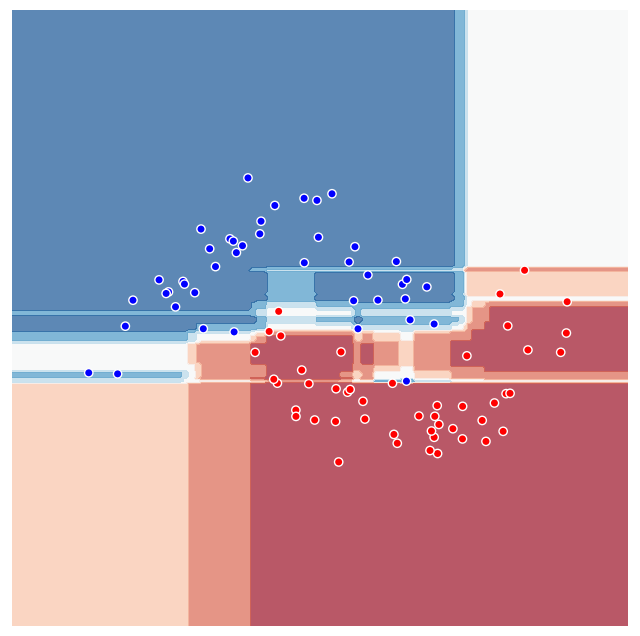

In [58]:
model = RandomForestClassifier(n_estimators=10, max_features=1)
model.fit(X_train, y_train)
plot_RF_contour(model)

### 5-4-5 plot all trees 

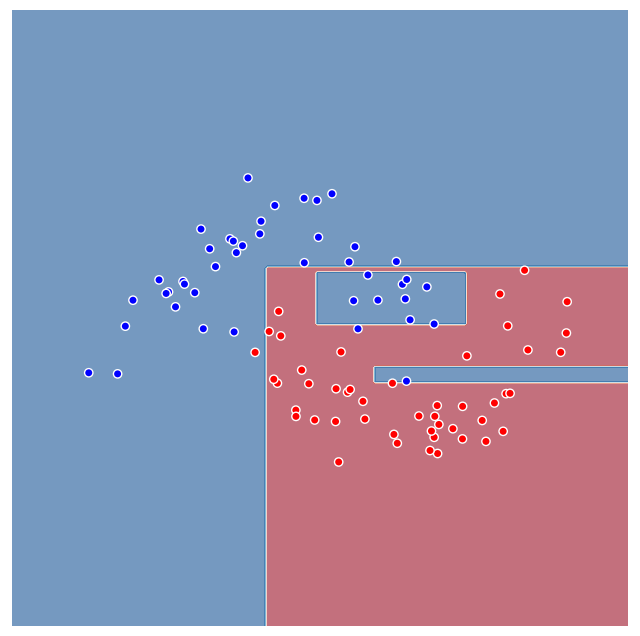

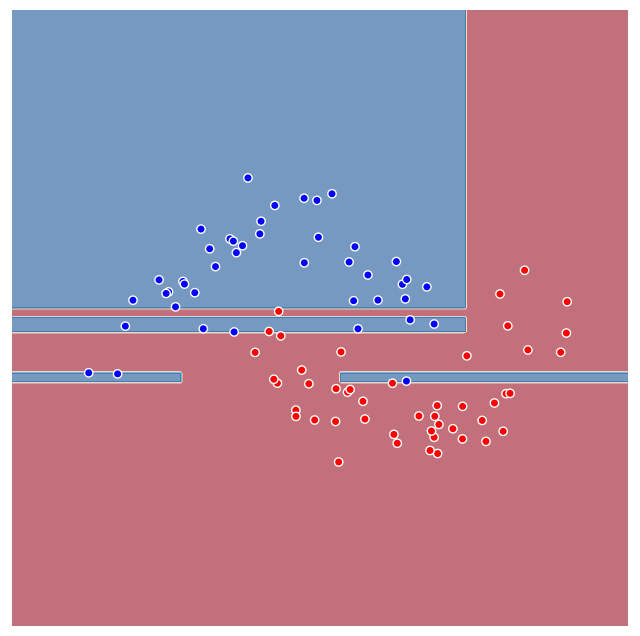

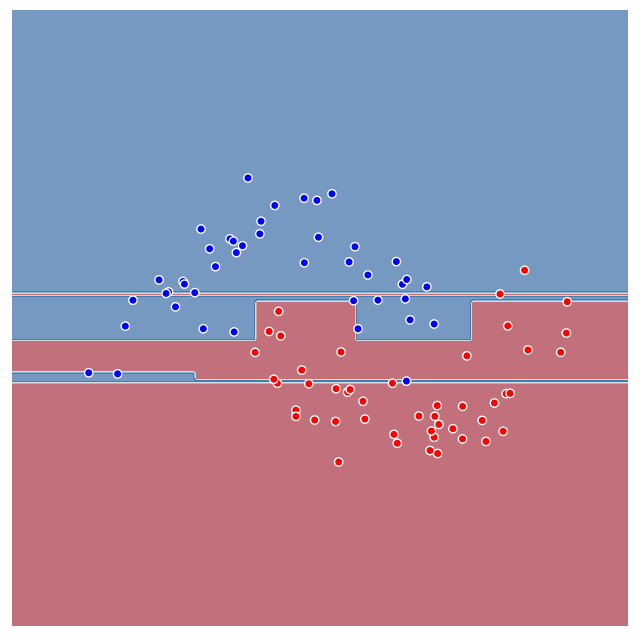

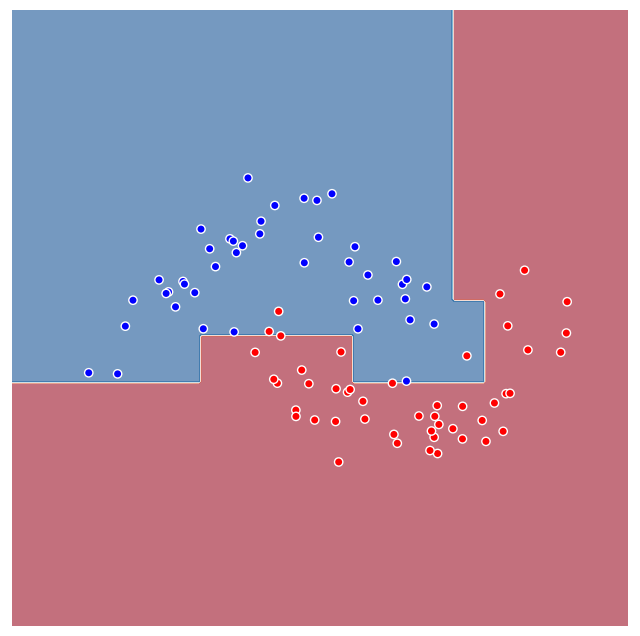

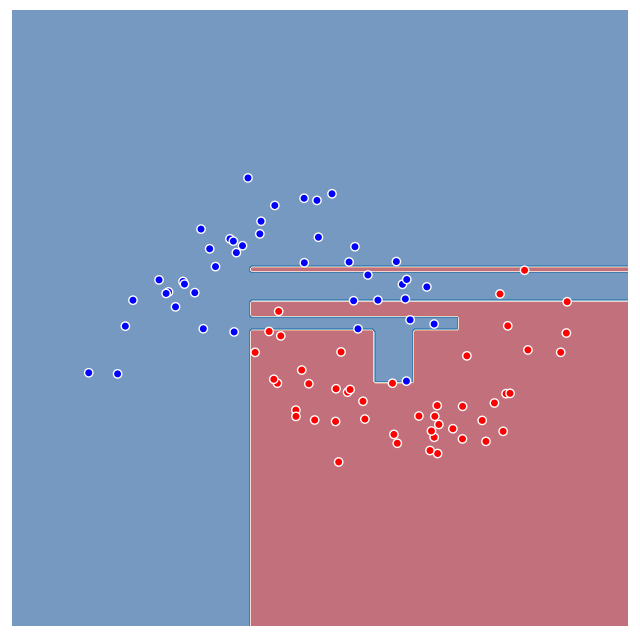

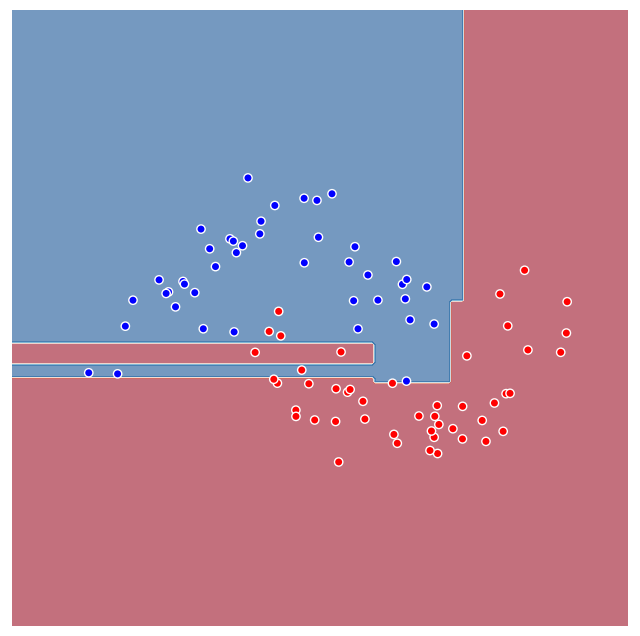

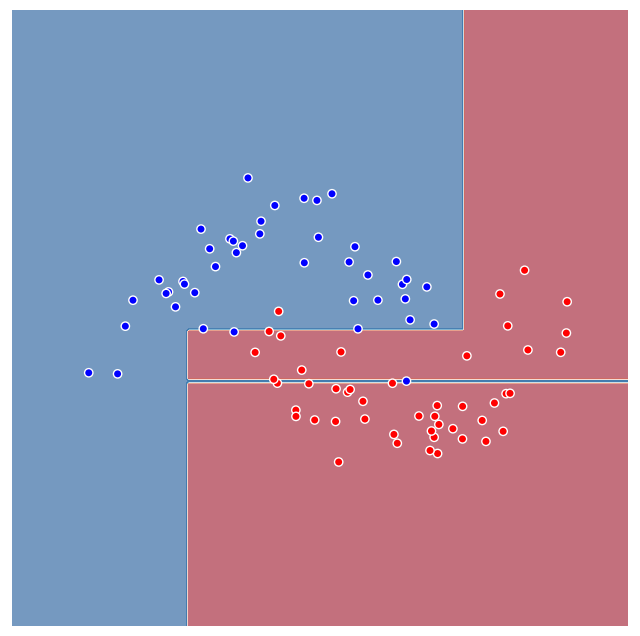

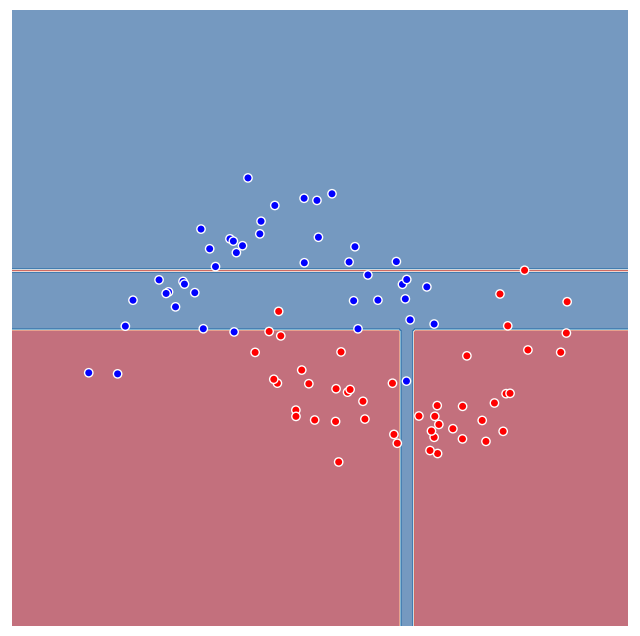

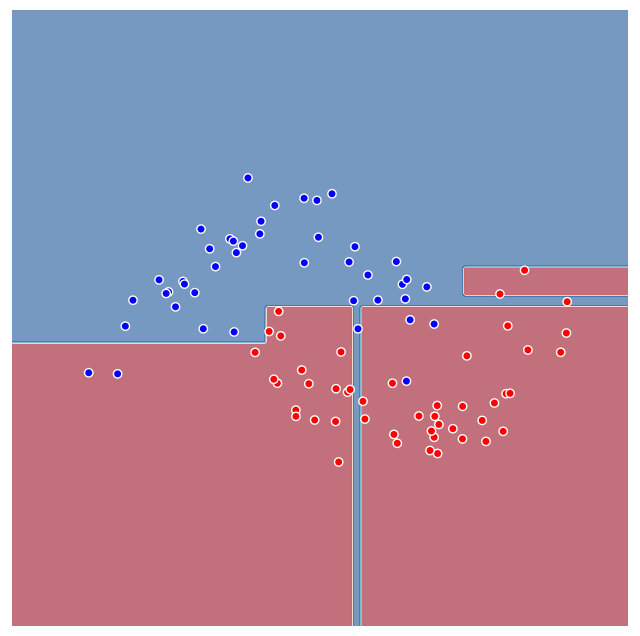

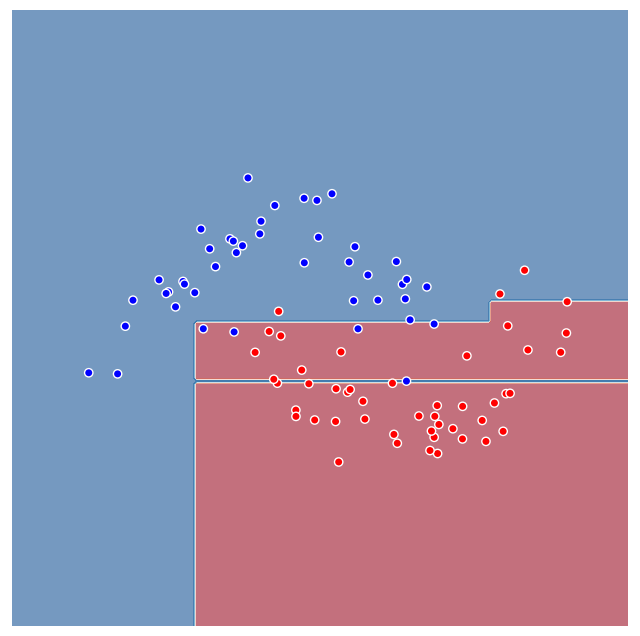

In [59]:
d1_grid, d2_grid, d12_array = get_Xgrid()
n = d1_grid.shape[0]

for i, tree in enumerate(model.estimators_):

    y_array = tree.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))

    fig, ax = plt.subplots(figsize=(8,8))
#     db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm)
    db = plt.contourf(d1_grid, d2_grid, y_grid,cmap=cm,alpha=0.6)
#     tit = plt.title("HELLO",fontsize=24)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
    plt.xlim((-2,2.7))
    plt.ylim((-2,2.7))
    plt.xticks(())
    plt.yticks(())
    plt.axis('equal')
    plt.grid(linestyle='--')
    ax.axis('off')
    
    plt.savefig("tree{}".format(i), transparent=True)


## Section six: Implementing the AdaBoost Algorithm


This activity focuses on using the `AdaBoostClassifier` and the performance resulting from changing the base classifier that is used.  Adaptive boosting is a successive reweighting of data using a set number of estimators.  These weighted estimators are what form the ensemble, and the predictions are a result of a weighted combination of the estimators.  


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [28]:
df = pd.read_csv('data/fetal_health.csv')

In [29]:
X = df.drop('fetal_health', axis = 1).values
y = df['fetal_health']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=42)

## 6-1- `AdaBoostClassifier`


Instantiate an `AdaBoostClassifier` estimator with `max_depth=1` 

In [32]:
adboost= DecisionTreeClassifier(max_depth=1)

### ANSWER CHECK
adboost

DecisionTreeClassifier(max_depth=1)

## 6-2-  Fitting the Ensemble



Define an `AdaBoostClassifier` estimator with default parameters and to fit to the data `X_train` and `y_train`. Assign this model to `model_1` below.

Assign the accuracy of the model on the test data to `model_1_acc` below.

In [34]:
model_1 = AdaBoostClassifier().fit(X_train, y_train)
model_1_acc = model_1.score(X_test, y_test)


### ANSWER CHECK
print(model_1_acc)

0.9097744360902256


## 6-3- Grid Searching the Ensemble


As the documentation states [on this page](https://scikit-learn.org/stable/modules/ensemble.html#usage), the main parameters to search are the number of estimators and the complexity of the base estimator.  

In the code cell below, I create a parameter grid that considers the following parameters:

- *number of estimators*: 100, 200
- *max_depths*: 1, 2, 3

Name this grid `params`.

Next, use the grid `params` with the `AdaBoostClassifier` to perform a grid search named `tree_grid` on the train data.  For this step, be sure to set the `random_state = 42` in your `AdaBoostClassifier`. 

Finally, calculate the score on the test data as `grid_acc`.  

In [35]:
params = {'n_estimators': [100, 200],
         'estimator__max_depth': [1, 2, 3]}
tree_grid = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state = 42), 
                         param_grid=params).fit(X_train, y_train)
grid_acc = tree_grid.score(X_test, y_test)


### ANSWER CHECK
print(grid_acc)

0.9548872180451128


## 6-4- A Different Base Estimator



Consider using a different base estimator such as `LogisticRegression` estimator.  Explore the neighbors parameters with 

- `C = [.001, 0.01, 0.1, 1.0, 10.0]`

I Create a `Pipeline` that scales the data first and then implements an `AdaBoostClassifier` with `random_state = 42` and a Logistic Regression model.  Grid search the pipeline with a grid and assign the score on the test data to `score2`. 



In [37]:
params = {'mod__estimator__C': [.001, 0.01, 0.1, 1.0, 10.0]}
p = Pipeline([('scale', StandardScaler()),
             ('mod', AdaBoostClassifier(estimator = LogisticRegression(), 
                                       random_state = 42))
             ])
g = GridSearchCV(p,
                param_grid=params)
g.fit(X_train, y_train)
score2 = g.score(X_test, y_test)


### ANSWER CHECK
print(score2)

0.8458646616541353


# Section seven: Gradient Boosting


This activity focuses on using the Gradient Boosting models in Scikit-Learn.  

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [39]:
def f(x):
    '''
    Small example regression dataset.
    '''
    np.random.seed(42)
    return np.sin(x**2) + np.random.normal(size = len(x), scale = 0.1)

In [40]:
x = np.linspace(0, 3, 20)
y = f(x)

In [41]:
X = x.reshape(-1, 1) #Make it 2D for sklearn

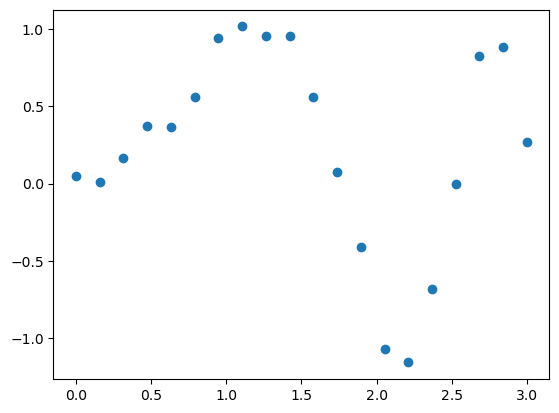

In [42]:
plt.scatter(x, y)

## 7-1- Gradient Boosted Regressor


I Use the `GradientBoostingRegressor` to create a model with default parameters `reg` and fit the model on `X` and `y`.  Assign the predictions as an array to `reg_pred`.  Uncomment the code to visualize the results.

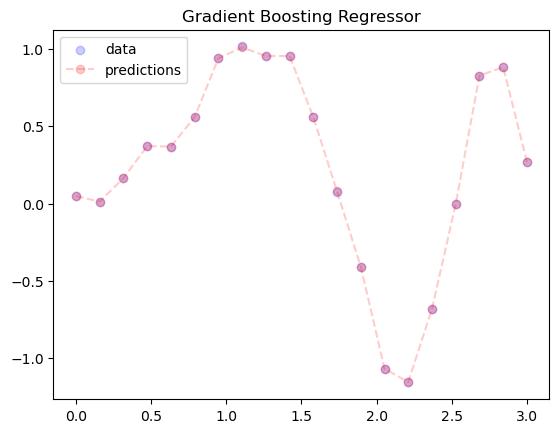

In [43]:
reg = GradientBoostingRegressor().fit(X, y)
reg_pred = reg.predict(X)


### ANSWER CHECK
plt.scatter(x, y, color = 'blue', alpha = 0.2, label = 'data')
plt.plot(x, reg_pred, '--ro', alpha = 0.2, label = 'predictions')
plt.title ('Gradient Boosting Regressor')
plt.legend();

## 7-2- Gradient Boosting Classifier




The data for classification is again loaded and prepared below.  Use this to create a `GradientBoostingClassifier` with `random_state=0` named `clf` and fit this on the training data.  I Score the accuracy of the model as `boost_acc` below. 

In [44]:
df = pd.read_csv('data/fetal_health.csv')
X = df.drop('fetal_health', axis = 1).values
y = df['fetal_health']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=42)

In [46]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
boost_acc = clf.score(X_test, y_test)


### ANSWER CHECK
print(boost_acc)

0.9511278195488722
